In [ ]:
import numpy as np
import pandas as pd
from customtokenizer import tokenizer, tokenizer_porter

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression class
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.y = y

        for _ in range(self.iterations):
            self.update_weights()

    def update_weights(self):
        y_hat = sigmoid(np.dot(self.X, self.weights) + self.bias)

        dw = (1 / self.m) * np.dot(self.X.T, (y_hat - self.y))
        db = (1 / self.m) * np.sum(y_hat - self.y)

        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
        y_pred = sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_class)

In [ ]:
# Importing the dataset and preprocessing
df = pd.read_csv('Tweets.csv')
df.drop(['selected_text', 'textID'], axis=1, inplace=True)
df.dropna(inplace=True)
df['sentiment'] = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Filtering the text
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def preprocessor(text):
    text = text.lower()
    text = ''.join([i for i in text if i in string.ascii_lowercase + ' '])
    text = ' '.join([porter.stem(word) for word in text.split()])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['text'] = df['text'].apply(preprocessor)

# Vectorizing text data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, tokenizer=tokenizer_porter, use_idf=True, norm='l2', smooth_idf=True)
X = tfidf.fit_transform(df.text).toarray()
y = df['sentiment'].values

# Splitting the data
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.4139374090247453


C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1523
     Neutral       0.41      1.00      0.59      2275
    Positive       0.00      0.00      0.00      1698

    accuracy                           0.41      5496
   macro avg       0.14      0.33      0.20      5496
weighted avg       0.17      0.41      0.24      5496



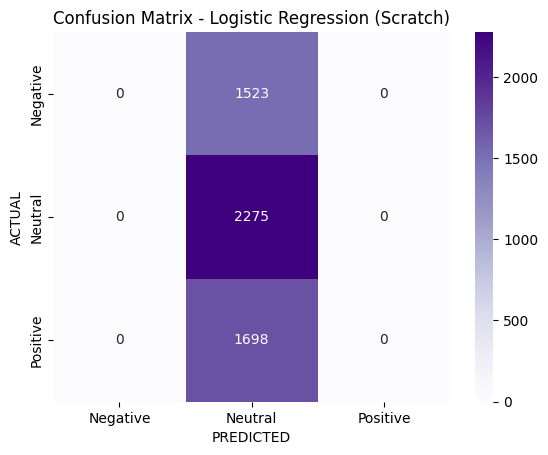

In [3]:
# Training and predicting using the custom Logistic Regression model
LR_model = LogisticRegressionFromScratch(learning_rate=0.01, iterations=1000)
LR_model.fit(Train_X, Train_Y)
predictions = LR_model.predict(Test_X)

# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(Test_Y, predictions))
print("Classification Report:\n", classification_report(Test_Y, predictions, target_names=['Negative', 'Neutral', 'Positive']))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(Test_Y, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression (Scratch)')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()
